# Lab 1 - FrozenLake MDP: Part 1
# Assignment

- In this assignment you will learn how to tackle problems with limited state spaces.
- In particular we consider the FrozenLake MDP problem.

# Outline

- Part 0 introduces us to [gym](https://gymnasium.farama.org/), an environment that allows us to test our reinforcement learning algorithms in various problems
- In Part 1, you will implement a policy iteration algorithm (HW1)
- In Part 2, you will implement Q-Learning and SARSA (in next homework HW2) 

# Deliverable

Regarding the Lab:

- Make sure your code runs from top to bottom without any errors.
- Your submitted Notebook must contain saved outputs.

In [1]:
import os
# You will need numpy and gym. You can try running the following lines to install them
# The assignment is tested on Python3.8 so in case you are having installation issues you might 
# want to try installing that version. 

# !{os.sys.executable} -m pip install numpy
!{os.sys.executable} -m pip install gymnasium
! pip install pygame
# !{os.sys.executable} -m pip install Pillow
# !{os.sys.executable} -m pip install ipython
#!{os.sys.executable} -m pip install pygame
import gymnasium as gym
import numpy as np
from PIL import Image
from IPython.display import display

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


# Part 0 - Introduction to Gym
- We look at [FrozenLake-v1 environment](https://gymnasium.farama.org/environments/toy_text/frozen_lake/) in gym. 
- You don't need to write any code for this part
- you should still understand the code to help you solve Part 1 and Part 2

In [2]:
# Import the environment we will use in this assignment
env=gym.make('FrozenLake-v1',is_slippery=True, render_mode="rgb_array") 

# Show the model
print(f"Number of States {env.observation_space.n}, Number of Actions {env.action_space.n}")
print(f"Reward range {env.reward_range}")

Number of States 16, Number of Actions 4
Reward range (0, 1)


In [3]:
env.reset() # reset the environment 

(0, {'prob': 1})

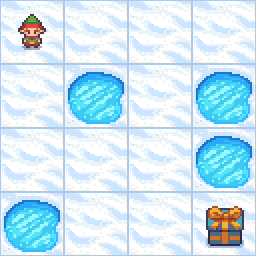

In [4]:
# visualize the current state
display(Image.fromarray(env.render()))

Render State after 25 slots


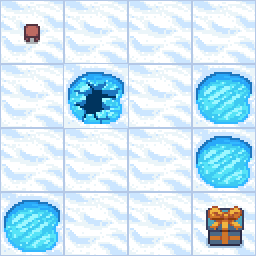

Reached terminal state? True


In [5]:
# run a policy that chooses actions randomly 
env.reset()
n = 25
for i in range(n):
    a = env.action_space.sample() # Sample Random Action
    state, reward, finished, _, _ = env.step(a)
    if finished: break
        
print(f'Render State after {n} slots')
display(Image.fromarray(env.render()))
print(f'Reached terminal state? {finished}')

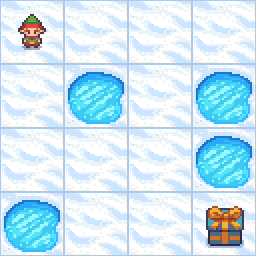

In [6]:
env.reset() # Let's reset the state again
display(Image.fromarray(env.render()))

# Part 1 - MDP and Planning: Implement Policy Iteration 
- In this part we will focus on methods that assume knowledge of the enivonment dynamics, in partucular you will implement Policy Iteration. 
- The environment model can be obtained through `env.P`

In [7]:
# No need to change anything here. Try to understand what happens 

# let's look at a random state-action pair and observe its transition characteristics
# you can re-run this cell to get a different state-action pair
random_state  = env.observation_space.sample()
random_action = env.action_space.sample()
# returns a list of tuples (probability,newstate,reward,is_terminal_state)
env.P[random_state][random_action] 

[(0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 4, 0.0, False),
 (0.3333333333333333, 8, 0.0, False)]

In [8]:
############################
# YOUR CODE HERE #
# Print all the terminal states in the environment.
# you can use env.P
############################
terminal_state = []
for state in env.P:
    for action in env.P[state]:
        for p in env.P[state][action]:
            pr, s, r, t = p
            if t:
                terminal_state.append(s)
print(f"Terminal States: {set(terminal_state)}")

Terminal States: {5, 7, 11, 12, 15}


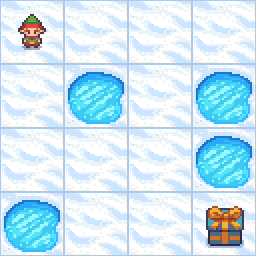

In [9]:
# Verify your solution (look at the positions where final states are)
display(Image.fromarray(env.render()))


### Step A: Implement Policy Evaluation


In [10]:
def policy_evaluation(P, nS, nA, policy, gamma=0.9, tol=1e-3):
    """Evaluate the value function from a given policy.

    Parameters
    ----------
    P, nS, nA, gamma:
        defined at beginning of file
    policy: np.array[nS]
        The policy to evaluate. Maps states to actions.
    tol: float
        Terminate policy evaluation when
            max |value_function(s) - prev_value_function(s)| < tol
    Returns
    -------
    value_function: np.ndarray[nS]
        The value function of the given policy, where value_function[s] is
        the value of state s
    """

    value_function = np.zeros(nS)

    while True:
        prev_value_function = np.copy(value_function)
        for s in range(nS):
            v = 0
            action = policy[s]
            for prob, next_state, reward, done in P[s][action]:
                v += prob * (reward + gamma * prev_value_function[next_state])
            value_function[s] = v

        if np.max(np.abs(prev_value_function - value_function)) < tol:
            break
    return value_function

#### Evaluate random policies

In [11]:
# Test your policy_evaluation on 5 randomly generated deterministic policies
# print the value function of the policies


ns = env.observation_space.n
na = env.action_space.n
for i in range(5):
    random_policy = np.random.randint(na, size=ns)
    print(f'-------- Policy {i}','-'*30)
    print(policy_evaluation(env.P, ns, na, random_policy))



-------- Policy 0 ------------------------------
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
-------- Policy 1 ------------------------------
[3.41177670e-03 7.83678510e-03 2.37008952e-02 9.66573270e-03
 1.20659220e-03 0.00000000e+00 4.92505518e-02 0.00000000e+00
 3.76236900e-04 4.24072722e-02 1.41335631e-01 0.00000000e+00
 0.00000000e+00 1.79408799e-02 3.80992284e-01 0.00000000e+00]
-------- Policy 2 ------------------------------
[0.00616642 0.01070589 0.02648617 0.01070589 0.00219176 0.
 0.06908584 0.         0.00061287 0.12277718 0.20538643 0.
 0.         0.20538643 0.56353501 0.        ]
-------- Policy 3 ------------------------------
[0.         0.         0.         0.         0.00759102 0.
 0.05446833 0.         0.026012   0.06205935 0.18214502 0.
 0.         0.026012   0.55369869 0.        ]
-------- Policy 4 ------------------------------
[9.44352594e-03 2.77338330e-03 8.17908840e-04 2.44244160e-04
 1.47702760e-02 0.00000000e+00 1.92937140e-04 0.00000000e+00
 4.1116968

### Step B: Implement Policy Improvement

In [12]:
def policy_improvement(P, nS, nA, value_from_policy, policy, gamma=0.9):
    """
    Given the value function from policy improve the policy.

    Parameters
    ----------
    P, nS, nA, gamma:
        defined at beginning of file
    value_from_policy: np.ndarray
        The value calculated from the policy
    policy: np.array
        The previous policy.

    Returns
    -------
    new_policy: np.ndarray[nS]
        An array of integers. Each integer is the optimal action to take
        in that state according to the environment dynamics and the
        given value function.
    """
    new_policy = np.zeros(nS, dtype='int')
    new_policy = np.zeros(nS, dtype='int')
    for s in range(nS):
        q_values = np.zeros(nA)
        for a in range(nA):
            for prob, next_state, reward, done in P[s][a]:
                q_values[a] += prob * (reward + gamma * value_from_policy[next_state])
        new_policy[s] = np.argmax(q_values)
    return new_policy

In [13]:
# Print the value before and after policy improvements for 5 randomly generated policies

ns = env.observation_space.n
na = env.action_space.n
for i in range(5):
    random_policy = np.random.randint(na, size=ns)
    print(f'-------- Policy {i}','-'*30)
    value_from_policy = policy_evaluation(env.P, ns, na, random_policy)
    print(value_from_policy)
    print(f'-------> Policy {i} IMPROVED','-'*21)
    random_policy = policy_improvement(env.P, ns, na, value_from_policy, random_policy)
    print(policy_evaluation(env.P, ns, na, random_policy))
    print()



-------- Policy 0 ------------------------------
[3.59623800e-03 8.74891800e-03 2.71152180e-02 1.08672300e-02
 1.16445600e-03 0.00000000e+00 5.44683270e-02 0.00000000e+00
 3.13470000e-04 5.45230020e-02 1.82151580e-01 0.00000000e+00
 0.00000000e+00 2.30492610e-02 5.53698691e-01 0.00000000e+00]
-------> Policy 0 IMPROVED ---------------------
[0.02544746 0.03629475 0.06140948 0.04450216 0.06166765 0.
 0.10051655 0.         0.12096546 0.22295813 0.27473218 0.
 0.         0.34933607 0.59361435 0.        ]

-------- Policy 1 ------------------------------
[0.         0.         0.         0.         0.00574852 0.
 0.05446833 0.         0.01959475 0.06021684 0.18214502 0.
 0.         0.02534326 0.55369869 0.        ]
-------> Policy 1 IMPROVED ---------------------
[0.05774564 0.0241544  0.05189282 0.02200123 0.07964486 0.
 0.09799433 0.         0.13050449 0.22681009 0.27540565 0.
 0.         0.35139876 0.59403406 0.        ]

-------- Policy 2 ------------------------------
[0. 0. 0. 0. 0. 

### Step C: Implement Policy Iteration

In [14]:
def policy_iteration(P, nS, nA, gamma=0.9, tol=1e-3):
    """ 
    Run policy iteration for dynamics of P.

    You should use your methods: policy_evaluation() and policy_improvement() here

    Parameters: 
    P, nS, nA, gamma: defined at beginning of file
    tolerance:        tolerance parameter used in policy_evaluation()
    
    Returns: 
    value_function: np.ndarray[nS]
    policy:         np.ndarray[nS]
    """

    value_function = np.zeros(nS)
    policy = np.zeros(nS, dtype=int)

    while True:
        value_function = policy_evaluation(P, nS, nA, policy, gamma, tol)
        new_policy = policy_improvement(P, nS, nA, value_function, policy, gamma)

        if (new_policy == policy).all():
            break

        policy = new_policy
    return value_function, policy

#### Call your function for gamma=0.9 and gamma=0.6

In [15]:
V_pi_s, p_pi_s = policy_iteration(env.P, env.observation_space.n, env.action_space.n, gamma=0.9, tol=1e-3)
V_pi_s, p_pi_s

(array([0.06237625, 0.05593278, 0.07041162, 0.05147676, 0.08589466,
        0.        , 0.11002402, 0.        , 0.14055576, 0.24415129,
        0.29725924, 0.        , 0.        , 0.37747618, 0.63771531,
        0.        ]),
 array([0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0]))

In [16]:
V_pi_f, p_pi_f = policy_iteration(env.P, env.observation_space.n, env.action_space.n, gamma=0.6, tol=1e-3)
V_pi_f, p_pi_f

(array([0.0008448 , 0.00139093, 0.0055168 , 0.00156587, 0.00286293,
        0.        , 0.0214272 , 0.        , 0.0119808 , 0.0470272 ,
        0.10272853, 0.        , 0.        , 0.12289707, 0.44699307,
        0.        ]),
 array([2, 3, 2, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0]))

#### What do you observe in terms of impact of gamma on the actions taken by the policy?

It appears that the actions are much more risky for gamma = 0.6. Actions 1 and 2 are more risky than actions 0 and 3 because the agent starts at the top left of the map so up and to the left (0, 3) represent safe choices, and down and to the right (1, 2) represent risky actions that travel into the unknown. This makes sense because gamma 0.9 would make the optimization more sensitive to the future where the costs for risk taking are paid.